In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
%matplotlib inline

In [23]:
df = pd.read_csv('/Users/kalickipawel/Documents/Programming/Python/5dw_challenge/etap_3/dane/driving_log.csv', 
                 names=['center', 'left', 'right', 'steering_angle', 'throttle', 'break', 'speed'])
df.head()

,center,left,right,steering_angle,throttle,break,speed
0,/Users/kalickipawel/Documents/Programming/Pyth...,/Users/kalickipawel/Documents/Programming/Pyth...,/Users/kalickipawel/Documents/Programming/Pyth...,0.0,0.0,0,0.000003
1,/Users/kalickipawel/Documents/Programming/Pyth...,/Users/kalickipawel/Documents/Programming/Pyth...,/Users/kalickipawel/Documents/Programming/Pyth...,0.0,0.0,0,0.000002
2,/Users/kalickipawel/Documents/Programming/Pyth...,/Users/kalickipawel/Documents/Programming/Pyth...,/Users/kalickipawel/Documents/Programming/Pyth...,0.0,0.0,0,0.000015
3,/Users/kalickipawel/Documents/Programming/Pyth...,/Users/kalickipawel/Documents/Programming/Pyth...,/Users/kalickipawel/Documents/Programming/Pyth...,0.0,0.0,0,0.000017
4,/Users/kalickipawel/Documents/Programming/Pyth...,/Users/kalickipawel/Documents/Programming/Pyth...,/Users/kalickipawel/Documents/Programming/Pyth...,0.0,0.0,0,0.000014


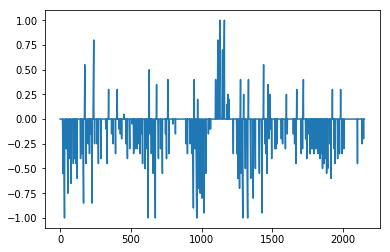

In [24]:
df['steering_angle'].plot()

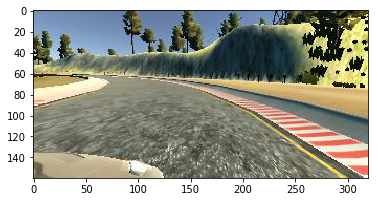

In [25]:
img = Image.open(df['right'][0])
plt.imshow(img)

In [26]:
img = np.asarray(img)
img.shape

(160, 320, 3)

In [27]:
def loadImage(fname):
    return np.asarray(Image.open(fname))
def process_image(img):
    return img[10:130:2,::4,:]

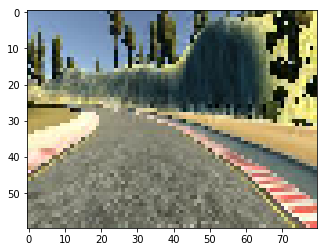

In [29]:
img = process_image(loadImage(df['center'][0]))
plt.imshow(img)

In [32]:
X = [process_image(loadImage(fname)) for fname in df['center']]
X += [process_image(loadImage(fname)) for fname in df['left']]
X += [process_image(loadImage(fname)) for fname in df['right']]

y = np.array(df['steering_angle'].values)
y = np.concatenate([y, y+.4, y-.4])

In [33]:
X = np.array(X)
print(X.shape)
print(y.shape)

(6453, 60, 80, 3)
(6453,)


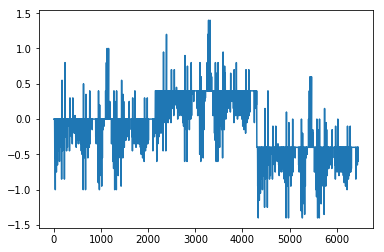

In [35]:
plt.plot(y)
plt.show();

In [37]:
np.save('X.npy', X)
np.save('y.npy', y)